In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [39]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")

# Read In Data & Data Prep

In [2]:
"""
Read in train and test as Pandas DataFrames
"""
df_train = pd.read_csv("train.csv")

In [3]:
df_train.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,gap
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1.19
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1.60
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1,0,0,0,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1.49
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1,0,0,0,1,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1.36
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1.98


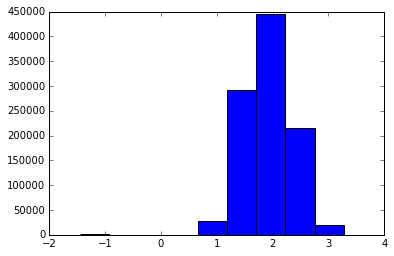

In [9]:
#first do some exploratory data analysis, and we find that 
#the distribution of gap is quite symmetric.
plt.hist(df_train['gap'])
plt.show()

In [4]:
df_test = pd.read_csv("test.csv")
df_test.head()

,Id,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,1,c1sc(-c2cnc3c(c2)c2nsnc2c2cc4cccnc4cc32)c2cc[n...,0,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2,[nH]1cccc1-c1cc2c3nsnc3c3c4sccc4[nH]c3c2s1,0,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,3,[nH]1c2cc(-c3ccc[se]3)c3nsnc3c2c2c3cscc3c3ccc4...,1,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,4,[nH]1c(cc2cnc3c(c12)c1=C[SiH2]C=c1c1ccc2=CCC=c...,1,0,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
4,5,c1sc(-c2sc(-c3sc(-c4scc5[se]ccc45)c4ccoc34)c3c...,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
#store gap values
Y_train = df_train.gap.values
#row where testing examples start
test_idx = df_train.shape[0]
#delete 'Id' column
df_test = df_test.drop(['Id'], axis=1)
#delete 'gap' column
df_train = df_train.drop(['gap'], axis=1)

In [101]:
#DataFrame with all train and test examples so we can more easily apply feature engineering on
df_all = pd.concat((df_train, df_test), axis=0)
df_all.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1,0,0,0,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1,0,0,0,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [102]:
"""
Example Feature Engineering

this calculates the length of each smile string and adds a feature column with those lengths
Note: this is NOT a good feature and will result in a lower score!
"""
#miles_len = np.vstack(df_all.smiles.astype(str).apply(lambda x: len(x)))
#df_all['smiles_len'] = pd.DataFrame(smiles_len)

#Number of c
df_all['small_c']=df_all['smiles'].apply(lambda r: r.count('c'))
df_all['big_c']=df_all['smiles'].apply(lambda r: r.count('C'))
df_all['nH']=df_all['smiles'].apply(lambda r: r.count('[nH]'))
df_all['SiH2']=df_all['smiles'].apply(lambda r: r.count('[SiH2]'))
df_all['onelink']=df_all['smiles'].apply(lambda r: r.count('-'))
df_all['doublelink']=df_all['smiles'].apply(lambda r: r.count('='))
df_all['subgroup']=df_all['smiles'].apply(lambda r: r.count('('))
df_all['se']=df_all['smiles'].apply(lambda r: r.count('se'))
df_all['doublelinkC']=df_all['smiles'].apply(lambda r: r.count('=C'))
df_all['cnc']=df_all['smiles'].apply(lambda r: r.count('cnc'))


featAd=['small_c','big_c','nH','SiH2','onelink','doublelink','subgroup','se','cnc','doublelinkC']

df_all.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,small_c,big_c,nH,SiH2,onelink,doublelink,subgroup,se,doublelinkC,cnc
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0,0,0,0,1,0,1,0,0,...,19,0,0,0,3,0,3,1,0,1
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1,0,0,0,1,0,1,0,0,...,12,9,0,2,0,5,1,0,4,0
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1,0,0,0,1,1,1,0,0,...,18,3,1,1,3,1,2,0,1,0
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1,0,0,0,1,1,1,0,0,...,18,5,1,2,2,4,1,0,2,0
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0,0,0,0,1,0,1,0,0,...,20,0,0,0,1,0,1,0,0,2


In [91]:
print df_all.head(20).smiles.values

['c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2nsnc12'
 'C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[SiH2]C=c12'
 '[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-23)c2ccccc12'
 '[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13)c1=C[SiH2]C=c21'
 'c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1'
 'C1=Cc2cnc3cc4cc(-c5scc6[nH]ccc56)c5ccccc5c4cc3c2[SiH2]1'
 'c1ncc(s1)-c1cnc2c(c1)oc1c2ccc2ccccc12'
 'c1sc(-c2ccc3c(c2)sc2c3c3=CCC=c3c3cccnc23)c2[se]ccc12'
 'c1ccc(o1)-c1cc2cc3cc4c5c[nH]cc5ccc4cc3cc2o1'
 '[nH]1ccc2c3c[nH]cc3c3cc(-c4cncs4)c4=CCC=c4c3c12'
 '[nH]1c(cc2c3cocc3c3c(ccc4ccc5=CCC=c5c34)c12)-c1cccs1'
 'c1cc2oc3c(sc4cc([se]c34)-c3cncc4nsnc34)c2o1'
 '[nH]1c(cc2cnc3cc4ccoc4cc3c12)-c1ccccc1'
 '[nH]1ccc2ccc3c4ncc(cc4[nH]c3c12)-c1scc2occc12'
 'c1sc(-c2sc(-c3sc(-c4ncncn4)c4nccnc34)c3cc[nH]c23)c2ccCc12'
 'c1cc2ncc(cc2s1)-c1cc2c(ccc3ccccc23)c2c[nH]cc12'
 'c1ccc(-c2cc3oc4ccc5c[nH]cc5c4c3cn2)c2cscc12'
 '[nH]1c2-c3ncc(cc3Cc2c2[se]ccc12)-c1scc2ccoc12'
 'c1cnc(s1)-c1ccc(cc1)-c1sc(c2Cccc12)-c1scc2occc12'
 'c

In [103]:
#Drop the 'smiles' column
df_all = df_all.drop(['smiles'], axis=1)
lcols = df_all.columns.values.tolist()
vals = df_all.values
X_train = vals[:test_idx]
X_test = vals[test_idx:]
print "Train features:", X_train.shape
print "Train gap:", Y_train.shape
print "Test features:", X_test.shape

Train features: (1000000, 266)
Train gap: (1000000,)
Test features: (824230, 266)


# Baseline

In [104]:
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR.fit(X_train, Y_train)

print "The Linear Regression Score is %0.6f" %LR.score(X_train,Y_train)
LR_pred = LR.predict(X_train)
print "Train data MSE is ",mean_squared_error(Y_train,LR_pred)

The Linear Regression Score is 0.609386
Train data MSE is  0.0647608192365


In [122]:
RF = RandomForestRegressor()
RF.fit(X_train[mask], Y_train[mask])

print "The Random Forest Regressor MSE is %0.6f" %RF.score(X_train[~mask],Y_train[~mask])
#RF_pred = RF.predict(X_train)
#print "Train data MSE is ",mean_squared_error(Y_train,RF_pred)

The Random Forest Regressor MSE is 0.775009


In [108]:
RF_pred = RF.predict(X_test)
write_to_file("RF_add.csv", RF_pred)

RF score with added features: 0.18965

# Feature Reduction

In [26]:
X_train.T[1]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [109]:
from scipy.stats.stats import pearsonr
correlations=[]
for col in xrange(X_train.shape[1]):
    r=pearsonr(X_train.T[col], Y_train)[0]
    correlations.append(dict(feature=lcols[col],corr=r, abscorr=np.abs(r)))

bpdf=pd.DataFrame(correlations).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(30)

/Users/Jing/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,abscorr,corr
feature,,
feat_025,0.419651,-0.419651
subgroup,0.374025,-0.374025
feat_218,0.363033,-0.363033
feat_102,0.363033,-0.363033
feat_119,0.351509,-0.351509
feat_001,0.275202,-0.275202
SiH2,0.273061,-0.273061
onelink,0.257443,-0.257443
doublelink,0.215819,-0.215819


In [110]:
highcorr28=bpdf.head(28).index.values

# Reduced features and make transformation

In [111]:
vals_rd = df_all[highcorr28].values
X_train_rd = vals_rd[:test_idx]
X_test_rd = vals_rd[test_idx:]

LR = LinearRegression()
LR.fit(X_train_rd, Y_train)

print "The Linear Regression Score is %0.6f" %LR.score(X_train_rd,Y_train)
LR_pred = LR.predict(X_train_rd)
print "Train data MSE is ",mean_squared_error(Y_train,LR_pred)

The Linear Regression Score is 0.589331
Train data MSE is  0.0680857959251


In [98]:
#Check interaction terms degrees of polynomial.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(interaction_only=True)),\
                  ('linear', LinearRegression(fit_intercept=False))])

model = model.fit(X_train_rd, Y_train)
model.named_steps['linear'].coef_

array([  2.98655556e+00,  -4.01233053e-02,   6.38098239e-02,
        -9.79686633e-02,  -1.28790029e-01,   6.81002031e-02,
        -3.83428735e-01,  -2.36777524e-01,  -1.10642694e-03,
         4.37832522e-03,  -2.71678918e-03,   2.39866315e-03,
         7.00738559e-03,   1.47764281e-02,   1.44874902e-02,
         2.09820989e-02,  -2.68229481e-02,   8.40889733e-03,
         5.78146597e-03,   9.06195361e-03,  -2.63600702e-02,
        -4.57501996e-02,  -1.15381035e-02,  -2.37111953e-02,
        -1.46043573e-02,   6.91448277e-02,   1.07203060e-01,
        -1.13311935e-01,  -4.40287882e-02])

In [99]:
print "The Linear Regression Score is %0.6f" %model.score(X_train_rd,Y_train)
model_pred = model.predict(X_train_rd)
print "Train data MSE is ",mean_squared_error(Y_train,model_pred)

The Linear Regression Score is 0.354722
Train data MSE is  0.106982221276


In [33]:
from sklearn.cross_validation import KFold
n_folds=5
results=[]
hypothesisresults=[]
for train, test in KFold(X_train.shape[0], n_folds): # split data into train/test groups, 4 times
    model = Pipeline([('poly', PolynomialFeatures(interaction_only=True)),\
                  ('linear', LinearRegression(fit_intercept=False))])

    model = model.fit(X_train_rd[train], Y_train[train])
    hypothesisresults.append(mean_squared_error(Y_train[test], model.predict(X_train_rd[test]))) 
    # evaluate score function on held-out data
    results.append((np.mean(hypothesisresults), np.min(hypothesisresults), np.max(hypothesisresults))) # average

In [38]:
hypothesisresults

[0.078526002114524332,
 301280271342074.81,
 0.078506093482369019,
 0.078563148633583393,
 0.078906159690809705]

In [41]:
model = Pipeline([('poly', PolynomialFeatures(interaction_only=True)),\
                  ('linear', LinearRegression(fit_intercept=False))])

model = model.fit(X_train_rd, Y_train)

X_test_rd=df_test[highcorr28].values
PolyRD_pred=model.predict(X_test_rd)

In [43]:
write_to_file("ployLinReg.csv", PolyRD_pred)

### For this submission:

The Kaggle score is 0.27962, while the Baseline Linear Regression score is 0.29846.

The CLF score is 0.526392, while the Baseline Linear Regression score is 0.461.

# Ridge/Lasso

In [112]:
from sklearn.grid_search import GridSearchCV

def cv_optimize(clf,parameters,X,y,n_folds,score_func=None):
    if score_func:
        fitmodel = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        fitmodel = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    fitmodel.fit(X,y)
    print "BEST", fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_
    best = fitmodel.best_estimator_
    return best

In [113]:
def do_regress(clf, parameters,X,y,mask=None, reuse_split=None, score_func=None, n_folds=5):
    
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.5f" % (training_accuracy)
    print "Accuracy on test data:     %0.5f" % (test_accuracy)
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [51]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(X_train.shape[0]), train_size=0.7)
mask=np.ones(X_train.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [116]:
from sklearn.linear_model import Ridge
ridge, Xtrain, ytrain, Xtest, ytest = do_regress(Ridge(), {"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
                                                    X_train, Y_train,mask=mask,score_func="mean_squared_error",n_folds=3)

using mask
BEST {'alpha': 10.0} -0.0647948743583 [mean: -0.06480, std: 0.00034, params: {'alpha': 0.001}, mean: -0.06480, std: 0.00034, params: {'alpha': 0.01}, mean: -0.06480, std: 0.00034, params: {'alpha': 0.1}, mean: -0.06480, std: 0.00034, params: {'alpha': 1.0}, mean: -0.06479, std: 0.00034, params: {'alpha': 10.0}, mean: -0.06480, std: 0.00033, params: {'alpha': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.60934
Accuracy on test data:     0.60947
########################################################


/Users/Jing/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  app.launch_new_instance()


In [117]:
def nonzero(clf):
    featuremask=(clf.coef_ !=0.0)
    return pd.DataFrame(dict(feature=lcols, coef=clf.coef_, abscoef=np.abs(clf.coef_)))[featuremask].sort('abscoef', ascending=False)

In [118]:
ridge_importances=nonzero(ridge)
ridge_importances.set_index("feature", inplace=True)
ridgeRD=ridge_importances.index.values

/Users/Jing/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [119]:
X_train_rd = PolynomialFeatures(interaction_only=True).fit_transform(X_train_rd)
ridge2, Xtrain, ytrain, Xtest, ytest = do_regress(Ridge(), {"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
                                                    X_train_rd, Y_train,mask=mask,score_func="mean_squared_error")

using mask
BEST {'alpha': 1.0} -0.0495843915231 [mean: -0.04958, std: 0.00017, params: {'alpha': 0.001}, mean: -0.04958, std: 0.00017, params: {'alpha': 0.01}, mean: -0.04958, std: 0.00017, params: {'alpha': 0.1}, mean: -0.04958, std: 0.00017, params: {'alpha': 1.0}, mean: -0.04959, std: 0.00017, params: {'alpha': 10.0}, mean: -0.04963, std: 0.00017, params: {'alpha': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.70126
Accuracy on test data:     0.70147
########################################################


/Users/Jing/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  app.launch_new_instance()


In [ ]:
vals_rd = df_all[ridgeRD].values
X_train_rd_2 = vals_rd[:test_idx]
X_test_rd_2 = vals_rd[test_idx:]

X_train_rd_2=PolynomialFeatures(interaction_only=True).fit_transform(X_train_rd_2)
ridge3, Xtrain, ytrain, Xtest, ytest = do_regress(Ridge(), {"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
                                                    X_train_rd_2, Y_train,mask=mask,score_func="mean_squared_error")

In [68]:
ridge3 = ridge3.fit(X_train_rd_2, Y_train)
X_test_rd_2=df_test[ridgeRD].values
X_test_rd_2=PolynomialFeatures(interaction_only=True).fit_transform(X_test_rd_2)

RidgeRD_pred=ridge3.predict(X_test_rd_2)

In [69]:
write_to_file("ridgeRD.csv", RidgeRD_pred)

The Kaggle score is 0.27941, while the Baseline Linear Regression score is 0.29846.

The CLF score is 0.52659, while the Baseline Linear Regression score is 0.461.


In [104]:
#Merge important features and select the few important features...

features=pd.concat([bpdf, ridge_importances], axis=1,join='inner')
features

,abscorr,corr,abscoef,coef
feature,,,,
feat_119,0.351509,-0.351509,0.431353,-0.431353
feat_044,0.011375,-0.011375,0.326316,0.326316
feat_251,0.201831,-0.201831,0.317880,-0.317880
feat_196,0.067323,-0.067323,0.310882,-0.310882
feat_069,0.016855,-0.016855,0.287012,-0.287012
feat_037,0.018839,-0.018839,0.223714,0.223714
feat_068,0.066528,-0.066528,0.220960,-0.220960
feat_102,0.363033,-0.363033,0.196895,-0.196895
feat_218,0.363033,-0.363033,0.196895,-0.196895


In [120]:
from sklearn.linear_model import Lasso
lasso, Xtrain, ytrain, Xtest, ytest = do_regress(Lasso(), {"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
                                                    X_train, Y_train,mask=mask,score_func="mean_squared_error")

using mask
BEST {'alpha': 0.001} -0.0659418048612 [mean: -0.06594, std: 0.00035, params: {'alpha': 0.001}, mean: -0.07582, std: 0.00033, params: {'alpha': 0.01}, mean: -0.15255, std: 0.00067, params: {'alpha': 0.1}, mean: -0.16583, std: 0.00067, params: {'alpha': 1.0}, mean: -0.16583, std: 0.00067, params: {'alpha': 10.0}, mean: -0.16583, std: 0.00067, params: {'alpha': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.60239
Accuracy on test data:     0.60263
########################################################


/Users/Jing/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  app.launch_new_instance()


In [ ]:
from sklearn.linear_model import Lasso
lasso, Xtrain, ytrain, Xtest, ytest = do_regress(Lasso(), {"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
                                                    X_train_rd, Y_train,mask=mask,score_func="mean_squared_error")

In [ ]:
from sklearn.linear_model import Lasso
lasso, Xtrain, ytrain, Xtest, ytest = do_regress(Lasso(), {"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
                                                    X_train, Y_train,mask=mask,score_func="mean_squared_error")

In [73]:
#Bayesian Ridge
from sklearn.linear_model import BayesianRidge

br = BayesianRidge(n_iter=300, tol=0.001, alpha_1=1.916/2)
br.fit(X_train_rd,Y_train)



BayesianRidge(alpha_1=0.958, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [74]:
br.score(X_train_rd,Y_train)

0.52641565815850599